In [1]:
# Import packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import matplotlib.animation as animation
import matplotlib.image as mpimg

In [2]:
save_dir = r'data\ssusa'
os.makedirs(save_dir, exist_ok=True)

In [3]:
# Define the directory path
data_dir = save_dir

# Define file paths
cluster_file = os.path.join(data_dir, 'Data_Clustered_Cleaned_50km_WithSciName.csv')
df = pd.read_csv(cluster_file)

C:\Users\cliff\AppData\Local\Temp\ipykernel_18340\3086355817.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(cluster_file)


In [4]:
# Display the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772478 entries, 0 to 772477
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                772478 non-null  int64  
 1   Project             772478 non-null  object 
 2   Camera_Trap_Array   772478 non-null  object 
 3   Deployment_ID       772478 non-null  object 
 4   Sequence_ID         760680 non-null  object 
 5   Start_Time          772478 non-null  object 
 6   End_Time            772478 non-null  object 
 7   Class               772478 non-null  object 
 8   Order               772478 non-null  object 
 9   Family              772478 non-null  object 
 10  Genus               772478 non-null  object 
 11  Species             772478 non-null  object 
 12  Common_Name         772478 non-null  object 
 13  Age                 772478 non-null  object 
 14  Sex                 772478 non-null  object 
 15  Group_Size          772478 non-nul

In [5]:
df.head()

,Year,Project,Camera_Trap_Array,Deployment_ID,Sequence_ID,Start_Time,End_Time,Class,Order,Family,...,Latitude,Longitude,Habitat,Development_Level,Feature_Type,Cluster_Agglo,Centroid_Latitude,Centroid_Longitude,City_State,Sci_Name
0,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s1,2019-08-31 06:50:00,2019-08-31 06:50:00,mammalia,carnivora,ursidae,...,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876,Haines Borough - Alaska,Ursus arctos
1,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s2,2019-08-31 14:15:00,2019-08-31 14:17:00,mammalia,carnivora,ursidae,...,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876,Haines Borough - Alaska,Ursus arctos
2,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s3,2019-08-31 18:22:00,2019-08-31 18:22:00,mammalia,carnivora,ursidae,...,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876,Haines Borough - Alaska,Ursus arctos
3,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s4,2019-08-31 20:58:00,2019-08-31 20:58:00,mammalia,carnivora,ursidae,...,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876,Haines Borough - Alaska,Ursus arctos
4,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s4,2019-08-31 20:58:00,2019-08-31 20:58:00,mammalia,carnivora,ursidae,...,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876,Haines Borough - Alaska,Ursus arctos


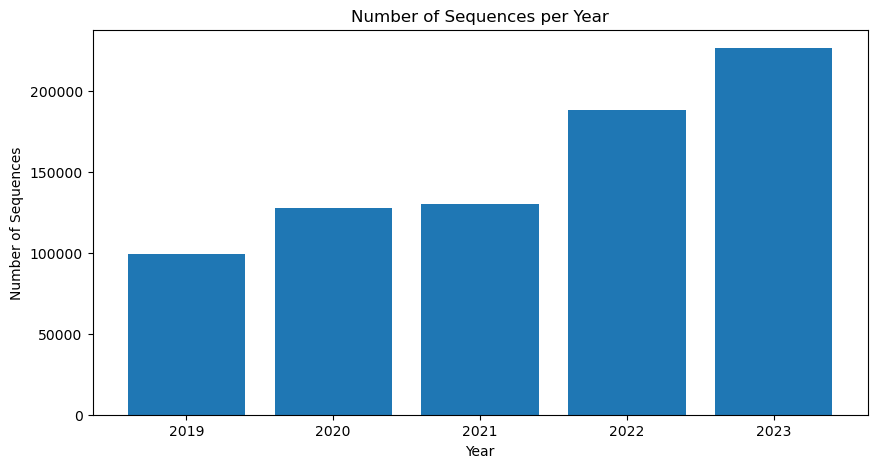

In [6]:
# Count number of sequences per year
year_counts = df['Year'].value_counts().sort_index()

# Plot the counts
plt.figure(figsize=(10,5))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Sequences')
plt.title('Number of Sequences per Year')
plt.show()

In [7]:
# Group by Camera_Trap_Array, Year, Latitude, Longitude
one_year_sites = (
    df
    .groupby(['Year', 'Camera_Trap_Array'])['Sci_Name']
    .unique()
    .reset_index()
    .rename(columns={'Sci_Name': 'Site_Species'})
)


In [8]:
# Calculate center latitude and longitude per Camera_Trap_Array
array_centers = (
    df.groupby(['Year', 'Camera_Trap_Array'])
    .agg({'Latitude': 'mean', 'Longitude': 'mean'})
    .reset_index()
    .rename(columns={'Latitude': 'Mean_Latitude', 'Longitude': 'Mean_Longitude'})
)

# Merge center coordinates into one_year_sites
one_year_sites = one_year_sites.merge(array_centers, on=['Year', 'Camera_Trap_Array'], how='left')

In [9]:
# Compute species richeness in each deployment site
one_year_sites['Richness'] = one_year_sites['Site_Species'].apply(len)
one_year_sites.head()

,Year,Camera_Trap_Array,Site_Species,Mean_Latitude,Mean_Longitude,Richness
0,2019,Abilene,"[Odocoileus virginianus, Sciurus niger, Procyo...",32.238302,-99.880539,10
1,2019,Alamance,"[Canis familiaris, Odocoileus virginianus, Can...",36.026070,-79.361561,11
2,2019,Amherst,"[Sciurus carolinensis, Odocoileus virginianus,...",42.392525,-72.508646,17
3,2019,Angelina,"[Odocoileus virginianus, Sus scrofa, Dasypus n...",31.500774,-94.771627,11
4,2019,AnthroRichmond,"[Sciurus carolinensis, Odocoileus virginianus,...",37.617700,-77.431672,9


In [10]:
years = sorted(one_year_sites['Year'].unique())

fig = plt.figure(figsize=(15, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-170, -55, 20, 72], crs=ccrs.PlateCarree())

land = cfeature.NaturalEarthFeature(
    'physical', 'land', '50m', edgecolor='face', facecolor='whitesmoke', alpha=0.9)
ocean = cfeature.NaturalEarthFeature(
    'physical', 'ocean', '50m', edgecolor='none', facecolor='lightcyan', alpha=0.7)
lakes = cfeature.NaturalEarthFeature(
    'physical', 'lakes', '50m', edgecolor='dodgerblue', facecolor='lightblue', alpha=0.5)

ax.add_feature(ocean, zorder=0)
ax.add_feature(land, zorder=1)
ax.add_feature(lakes, zorder=2)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='dimgray', linewidth=1.1, zorder=3)
ax.add_feature(cfeature.COASTLINE, edgecolor='k', linewidth=0.8, zorder=3)
ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle='-', linewidth=0.5, zorder=3)

gl = ax.gridlines(
    draw_labels=True, linewidth=0.4, color='gray', alpha=0.4, linestyle='--'
)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'fontsize': 12}
gl.ylabel_style = {'fontsize': 12}

richness_all = one_year_sites['Richness']
norm = mpl.colors.Normalize(vmin=richness_all.min(), vmax=richness_all.max())
cmap = plt.get_cmap('viridis')

data0 = one_year_sites[one_year_sites['Year'] == years[0]]
sc = ax.scatter(
    data0['Mean_Longitude'], data0['Mean_Latitude'],
    c=data0['Richness'], cmap=cmap, norm=norm,
    s=65, alpha=0.92,
    transform=ccrs.PlateCarree(),
    edgecolor='midnightblue', linewidth=0.35, zorder=10
)

cbar = plt.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
    ax=ax, orientation='vertical', shrink=0.78, pad=0.025
)
cbar.set_label('Richness\n', fontsize=14)
cbar.ax.tick_params(labelsize=12)

def update(year):
    data = one_year_sites[one_year_sites['Year'] == year]
    sc.set_offsets(list(zip(data['Mean_Longitude'], data['Mean_Latitude'])))
    sc.set_array(data['Richness'])
    ax.set_title(
        f'Camera Trap Array Richness\n{year}',
        fontsize=17, fontweight='bold', pad=18
    )
    if year not in saved_years:
        plt.savefig(f'output/species/site_richness_{year}.png', dpi=150)
        saved_years.add(year)
    return sc,

saved_years = set()
ani = animation.FuncAnimation(
    fig, update, frames=years, interval=1700, blit=False, repeat=True
)

ani.save('output/species/site_richness_animation.gif', writer='pillow', fps=1)
plt.close() 


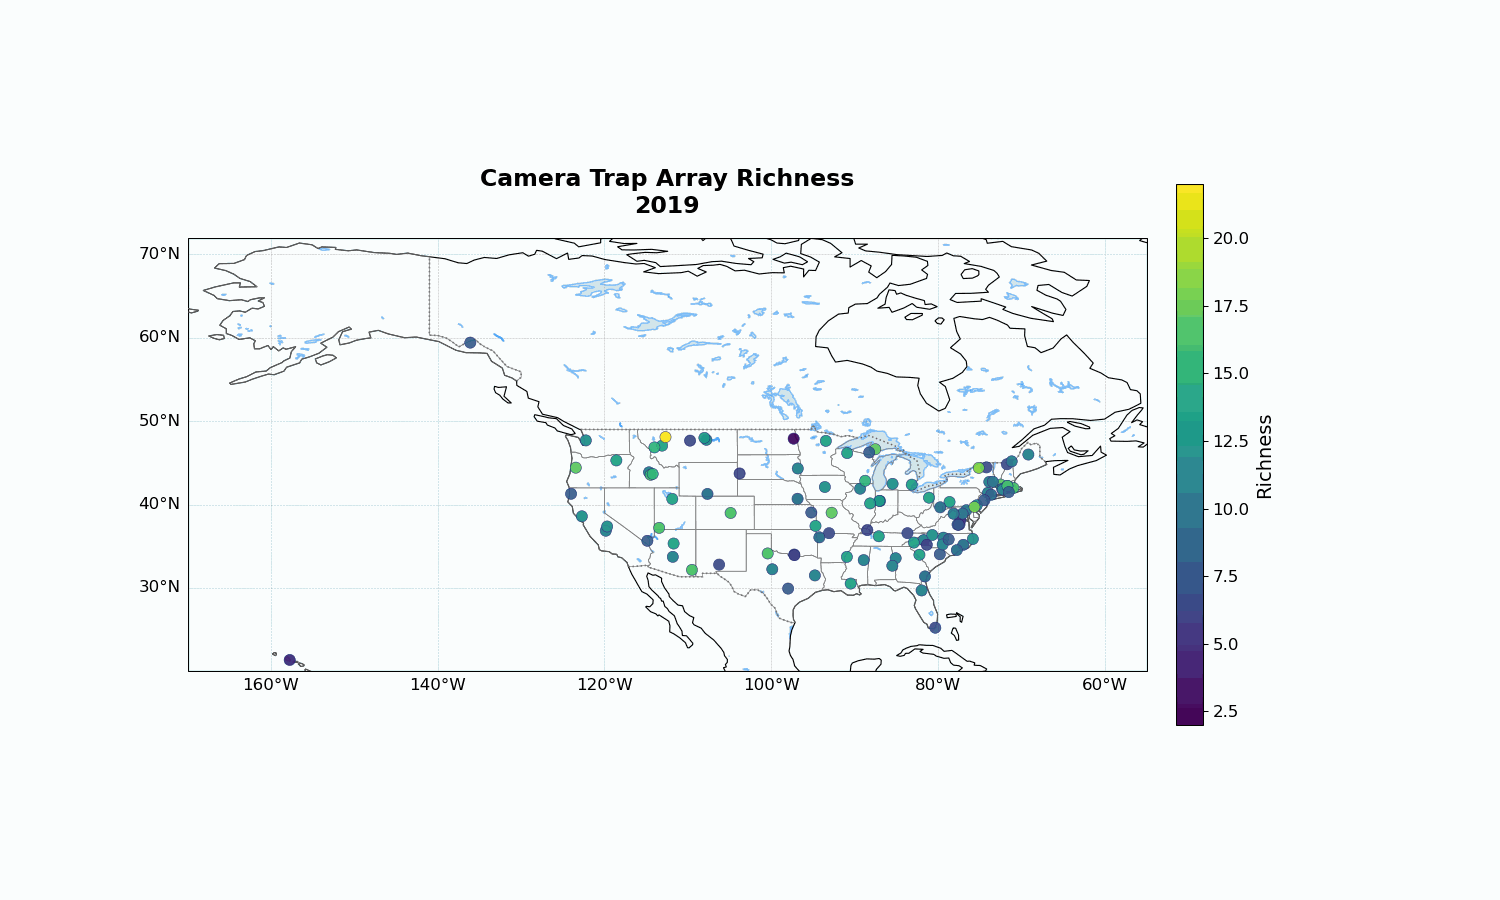

In [11]:
# Display the animation in Jupyter Notebook
from IPython.display import display, Image

display(Image(filename='output/species/site_richness_animation.gif'))


In [12]:
# Calculte Shannon Index, we are using counts(detections) of each species at each site, group_size is not used here.
def shannon_index(species_list):
    # Count occurrences of each species
    _, counts = np.unique(species_list, return_counts=True)
    proportions = counts / counts.sum()
    return -np.sum(proportions * np.log(proportions))

In [13]:
# Add a column for Shannon index to one_year_sites
one_year_sites['Shannon_Index'] = (
    df
    .groupby(['Year', 'Camera_Trap_Array'])['Sci_Name']
    .apply(lambda x: shannon_index(x.values))
    .values
)

In [14]:
one_year_sites.head()

,Year,Camera_Trap_Array,Site_Species,Mean_Latitude,Mean_Longitude,Richness,Shannon_Index
0,2019,Abilene,"[Odocoileus virginianus, Sciurus niger, Procyo...",32.238302,-99.880539,10,0.857688
1,2019,Alamance,"[Canis familiaris, Odocoileus virginianus, Can...",36.026070,-79.361561,11,0.810667
2,2019,Amherst,"[Sciurus carolinensis, Odocoileus virginianus,...",42.392525,-72.508646,17,1.733176
3,2019,Angelina,"[Odocoileus virginianus, Sus scrofa, Dasypus n...",31.500774,-94.771627,11,1.421829
4,2019,AnthroRichmond,"[Sciurus carolinensis, Odocoileus virginianus,...",37.617700,-77.431672,9,1.159130


In [15]:
# Plotting the Shannon Index per site per year
years = sorted(one_year_sites['Year'].unique())

fig = plt.figure(figsize=(15, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-170, -55, 20, 72], crs=ccrs.PlateCarree())

land = cfeature.NaturalEarthFeature(
    'physical', 'land', '50m', edgecolor='face', facecolor='whitesmoke', alpha=0.9)
ocean = cfeature.NaturalEarthFeature(
    'physical', 'ocean', '50m', edgecolor='none', facecolor='lightcyan', alpha=0.7)
lakes = cfeature.NaturalEarthFeature(
    'physical', 'lakes', '50m', edgecolor='dodgerblue', facecolor='lightblue', alpha=0.5)

ax.add_feature(ocean, zorder=0)
ax.add_feature(land, zorder=1)
ax.add_feature(lakes, zorder=2)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='dimgray', linewidth=1.1, zorder=3)
ax.add_feature(cfeature.COASTLINE, edgecolor='k', linewidth=0.8, zorder=3)
ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle='-', linewidth=0.5, zorder=3)

gl = ax.gridlines(
    draw_labels=True, linewidth=0.4, color='gray', alpha=0.4, linestyle='--'
)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'fontsize': 12}
gl.ylabel_style = {'fontsize': 12}

shannon_all = one_year_sites['Shannon_Index']
norm = mpl.colors.Normalize(vmin=shannon_all.min(), vmax=shannon_all.max())
cmap = plt.get_cmap('viridis')

data0 = one_year_sites[one_year_sites['Year'] == years[0]]
sc = ax.scatter(
    data0['Mean_Longitude'], data0['Mean_Latitude'],
    c=data0['Shannon_Index'], cmap=cmap, norm=norm,
    s=65, alpha=0.92,
    transform=ccrs.PlateCarree(),
    edgecolor='midnightblue', linewidth=0.35, zorder=10
)

cbar = plt.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
    ax=ax, orientation='vertical', shrink=0.78, pad=0.025
)
cbar.set_label('Shannon Index', fontsize=14)
cbar.ax.tick_params(labelsize=12)

def update(year):
    data = one_year_sites[one_year_sites['Year'] == year]
    sc.set_offsets(list(zip(data['Mean_Longitude'], data['Mean_Latitude'])))
    sc.set_array(data['Shannon_Index'])
    ax.set_title(
        f'Camera Trap Array Shannon Index\n{year} — USA and Alaska',
        fontsize=17, fontweight='bold', pad=18
    )
    if year not in saved_years:
        plt.savefig(f'output/species/site_shannon_{year}.png', dpi=150)
        saved_years.add(year)
    return sc,

saved_years = set()
ani = animation.FuncAnimation(
    fig, update, frames=years, interval=1700, blit=False, repeat=True
)

ani.save('output/species/site_shannon_animation.gif', writer='pillow', fps=1)
plt.close() 

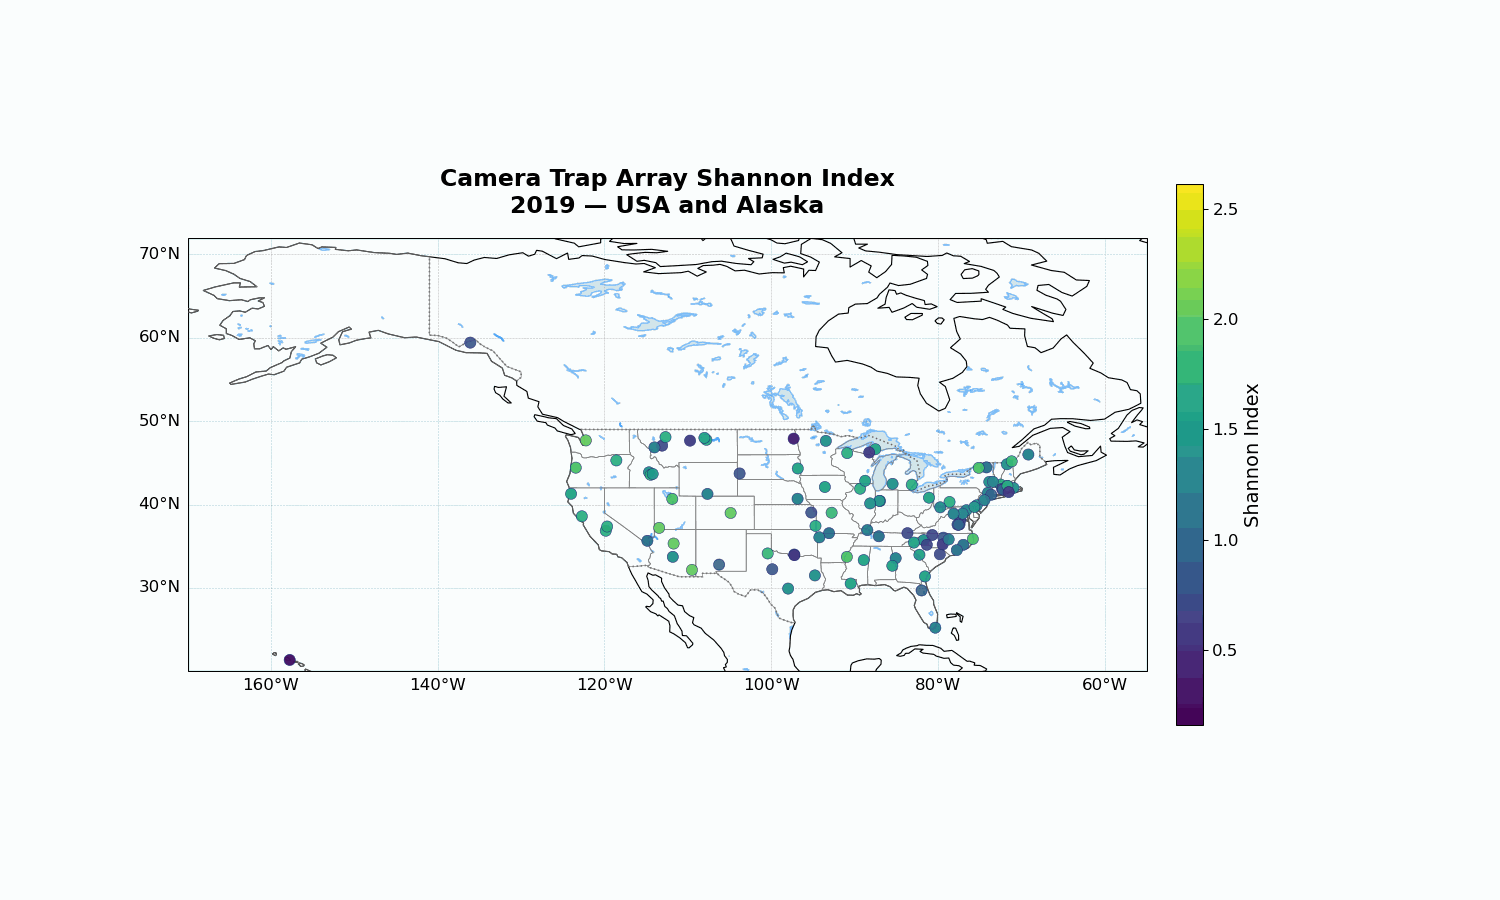

In [16]:
display(Image(filename='output/species/site_shannon_animation.gif'))

In [17]:
# Comparison of Richness and Shannon Index for each year (Optional)


# years = sorted(one_year_sites['Year'].unique())

# for year in years:
#     fig, axes = plt.subplots(2, 1, figsize=(10, 12))

#     # Load images
#     img_richness = mpimg.imread(f'output/species/site_richness_{year}.png')
#     img_shannon = mpimg.imread(f'output/species/site_shannon_{year}.png')

#     # Show richness (top)
#     axes[0].imshow(img_richness)
#     axes[0].axis('off')

#     # Show shannon (bottom)
#     axes[1].imshow(img_shannon)
#     axes[1].axis('off')

#     plt.tight_layout(pad=0.1)
#     plt.show()


In [18]:
# Calculate the camera trap site metrics throughout the whole dataset (2019-2023)

five_year_sites = (
    df.groupby(['Camera_Trap_Array'])['Sci_Name']
    .unique()
    .reset_index()
    .rename(columns={'Sci_Name': 'Site_Species'})
)
# Calculate center latitude and longitude per Camera_Trap_Array
array_centers = (
    df.groupby(['Camera_Trap_Array'])
    .agg({'Latitude': 'mean', 'Longitude': 'mean'})
    .reset_index()
    .rename(columns={'Latitude': 'Mean_Latitude', 'Longitude': 'Mean_Longitude'})
)

# Merge center coordinates into five_year_sites
five_year_sites = five_year_sites.merge(array_centers, on=['Camera_Trap_Array'], how='left')

# Calculate Species Richness
five_year_sites['Richness'] = five_year_sites['Site_Species'].apply(len)

# Calculate Shannon Index for the entire dataset
five_year_sites['Shannon_Index'] = (
    df
    .groupby(['Camera_Trap_Array'])['Sci_Name']
    .apply(lambda x: shannon_index(x.values))
    .values)

In [19]:
five_year_sites.head()

,Camera_Trap_Array,Site_Species,Mean_Latitude,Mean_Longitude,Richness,Shannon_Index
0,ARNWR,"[Ursus americanus, Odocoileus virginianus, Sci...",35.823833,-75.895270,12,1.912204
1,AandM,"[Boselaphus tragocamelus, Odocoileus virginian...",26.220916,-97.428225,12,0.870915
2,Abilene,"[Odocoileus virginianus, Sciurus niger, Procyo...",32.236841,-99.883238,20,1.424535
3,AbitaFlats,"[Lynx rufus, Canis latrans, Sciurus carolinens...",30.513196,-89.968166,8,1.302633
4,Afognak,"[Martes americana, Ursus arctos, Odocoileus he...",58.294399,-152.290101,8,1.122953


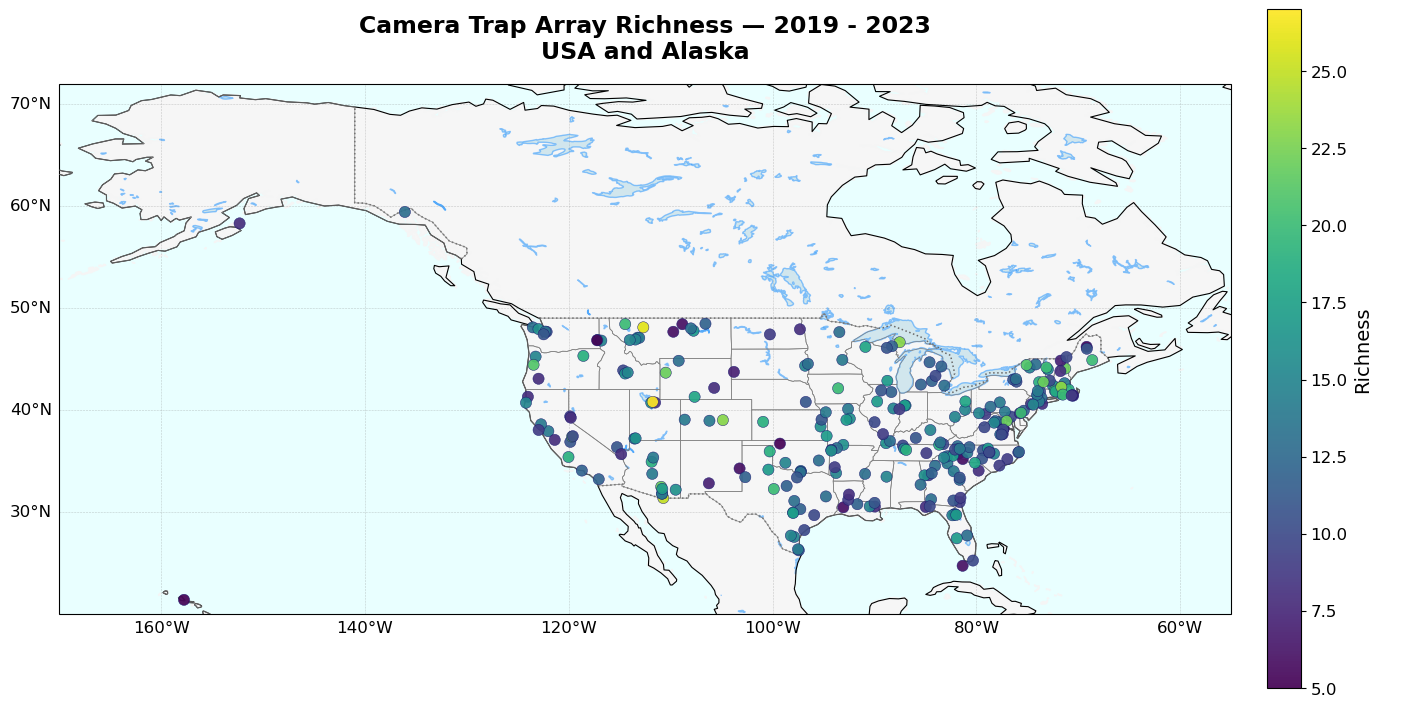

In [20]:
df_plot = five_year_sites.copy()

lons = df_plot['Mean_Longitude']
lats = df_plot['Mean_Latitude']
richness = df_plot['Richness']

fig = plt.figure(figsize=(15, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-170, -55, 20, 72], crs=ccrs.PlateCarree())

land = cfeature.NaturalEarthFeature(
    'physical', 'land', '50m', edgecolor='face', facecolor='whitesmoke', alpha=0.9)
ocean = cfeature.NaturalEarthFeature(
    'physical', 'ocean', '50m', edgecolor='none', facecolor='lightcyan', alpha=0.7)
lakes = cfeature.NaturalEarthFeature(
    'physical', 'lakes', '50m', edgecolor='dodgerblue', facecolor='lightblue', alpha=0.5)

ax.add_feature(ocean, zorder=0)
ax.add_feature(land, zorder=1)
ax.add_feature(lakes, zorder=2)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='dimgray', linewidth=1.1, zorder=3)
ax.add_feature(cfeature.COASTLINE, edgecolor='k', linewidth=0.8, zorder=3)
ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle='-', linewidth=0.5, zorder=3)

gl = ax.gridlines(
    draw_labels=True, linewidth=0.4, color='gray', alpha=0.4, linestyle='--'
)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'fontsize': 12}
gl.ylabel_style = {'fontsize': 12}

norm = mpl.colors.Normalize(vmin=richness.min(), vmax=richness.max())
cmap = plt.get_cmap('viridis')

sc = ax.scatter(
    lons, lats,
    c=richness, cmap=cmap, norm=norm,
    s=65, alpha=0.92,
    transform=ccrs.PlateCarree(),
    edgecolor='midnightblue', linewidth=0.35, zorder=10
)

cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.78, pad=0.025)
cbar.set_label('Richness\n', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.title(
    'Camera Trap Array Richness — 2019 - 2023\nUSA and Alaska',
    fontsize=17, fontweight='bold', pad=18
)
plt.tight_layout()
plt.show()


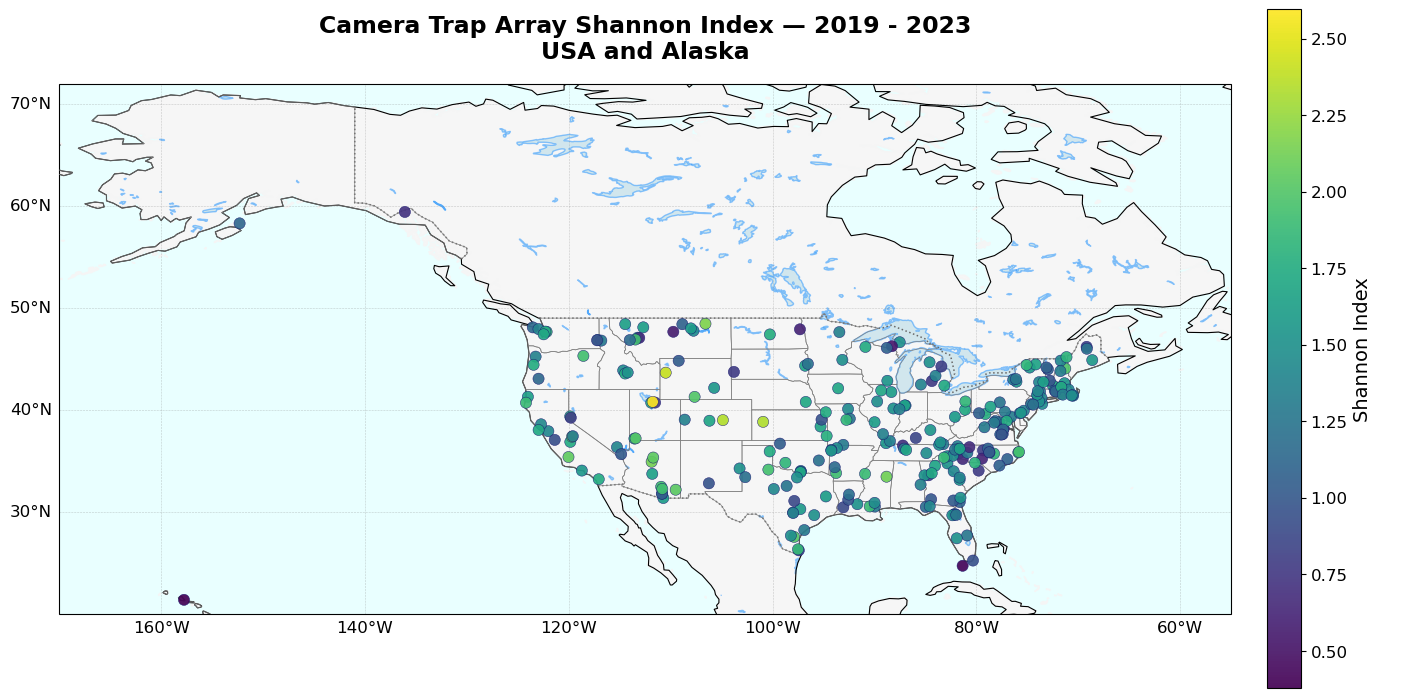

In [21]:
# Plotting the Shannon Index for the entire dataset
shannon = df_plot['Shannon_Index']

fig = plt.figure(figsize=(15, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-170, -55, 20, 72], crs=ccrs.PlateCarree())

land = cfeature.NaturalEarthFeature(
    'physical', 'land', '50m', edgecolor='face', facecolor='whitesmoke', alpha=0.9)
ocean = cfeature.NaturalEarthFeature(
    'physical', 'ocean', '50m', edgecolor='none', facecolor='lightcyan', alpha=0.7)
lakes = cfeature.NaturalEarthFeature(
    'physical', 'lakes', '50m', edgecolor='dodgerblue', facecolor='lightblue', alpha=0.5)

ax.add_feature(ocean, zorder=0)
ax.add_feature(land, zorder=1)
ax.add_feature(lakes, zorder=2)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='dimgray', linewidth=1.1, zorder=3)
ax.add_feature(cfeature.COASTLINE, edgecolor='k', linewidth=0.8, zorder=3)
ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle='-', linewidth=0.5, zorder=3)

gl = ax.gridlines(
    draw_labels=True, linewidth=0.4, color='gray', alpha=0.4, linestyle='--'
)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'fontsize': 12}
gl.ylabel_style = {'fontsize': 12}

norm = mpl.colors.Normalize(vmin=shannon.min(), vmax=shannon.max())
cmap = plt.get_cmap('viridis')

sc = ax.scatter(
    lons, lats,
    c=shannon, cmap=cmap, norm=norm,
    s=65, alpha=0.92,
    transform=ccrs.PlateCarree(),
    edgecolor='midnightblue', linewidth=0.35, zorder=10
)

cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.78, pad=0.025)
cbar.set_label('Shannon Index\n', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.title(
    'Camera Trap Array Shannon Index — 2019 - 2023\nUSA and Alaska',
    fontsize=17, fontweight='bold', pad=18
)
plt.tight_layout()
plt.show()


In [22]:
df.head()

,Year,Project,Camera_Trap_Array,Deployment_ID,Sequence_ID,Start_Time,End_Time,Class,Order,Family,...,Latitude,Longitude,Habitat,Development_Level,Feature_Type,Cluster_Agglo,Centroid_Latitude,Centroid_Longitude,City_State,Sci_Name
0,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s1,2019-08-31 06:50:00,2019-08-31 06:50:00,mammalia,carnivora,ursidae,...,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876,Haines Borough - Alaska,Ursus arctos
1,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s2,2019-08-31 14:15:00,2019-08-31 14:17:00,mammalia,carnivora,ursidae,...,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876,Haines Borough - Alaska,Ursus arctos
2,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s3,2019-08-31 18:22:00,2019-08-31 18:22:00,mammalia,carnivora,ursidae,...,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876,Haines Borough - Alaska,Ursus arctos
3,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s4,2019-08-31 20:58:00,2019-08-31 20:58:00,mammalia,carnivora,ursidae,...,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876,Haines Borough - Alaska,Ursus arctos
4,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s4,2019-08-31 20:58:00,2019-08-31 20:58:00,mammalia,carnivora,ursidae,...,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876,Haines Borough - Alaska,Ursus arctos


In [23]:
community_species = df.groupby(['Cluster_Agglo', 'Centroid_Latitude', 'Centroid_Longitude'])['Sci_Name'] \
    .unique() \
    .reset_index(name='Community_Species')

# Calculate Species Richness
community_species['Richness'] = community_species['Community_Species'].apply(len)

# Calculate Shannon Index
community_species['Shannon_Index'] = (
    df
    .groupby('Cluster_Agglo')['Sci_Name']
    .apply(lambda x: shannon_index(x.values))
    .values)

In [24]:
community_species.head()

,Cluster_Agglo,Centroid_Latitude,Centroid_Longitude,Community_Species,Richness,Shannon_Index
0,0,47.872681,-122.941040,"[Puma concolor, Odocoileus hemionus, Tamiasciu...",16,1.353901
1,1,40.794404,-73.811474,"[Sciurus carolinensis, Procyon lotor, Felis ca...",14,1.509974
2,2,39.735393,-75.619889,"[Vulpes vulpes, Sciurus carolinensis, Odocoile...",21,1.567726
3,3,40.756180,-96.768980,"[Odocoileus virginianus, Procyon lotor, Canis ...",11,1.711907
4,4,36.053106,-79.377192,"[Canis familiaris, Odocoileus virginianus, Can...",11,0.810667


In [25]:
# Check the stastical values for every metrics
community_species.describe()

,Cluster_Agglo,Centroid_Latitude,Centroid_Longitude,Richness,Shannon_Index
count,211.00000,211.000000,211.000000,211.000000,211.000000
mean,105.00000,38.603542,-93.898288,13.938389,1.470134
std,61.05462,5.833934,16.556416,4.922349,0.380174
min,0.00000,21.361755,-157.745430,5.000000,0.379070
25%,52.50000,34.772910,-105.967783,10.000000,1.267957
50%,105.00000,38.293372,-90.930675,13.000000,1.501773
75%,157.50000,42.667555,-81.357715,17.000000,1.716946
max,210.00000,59.413873,-68.646184,30.000000,2.398828


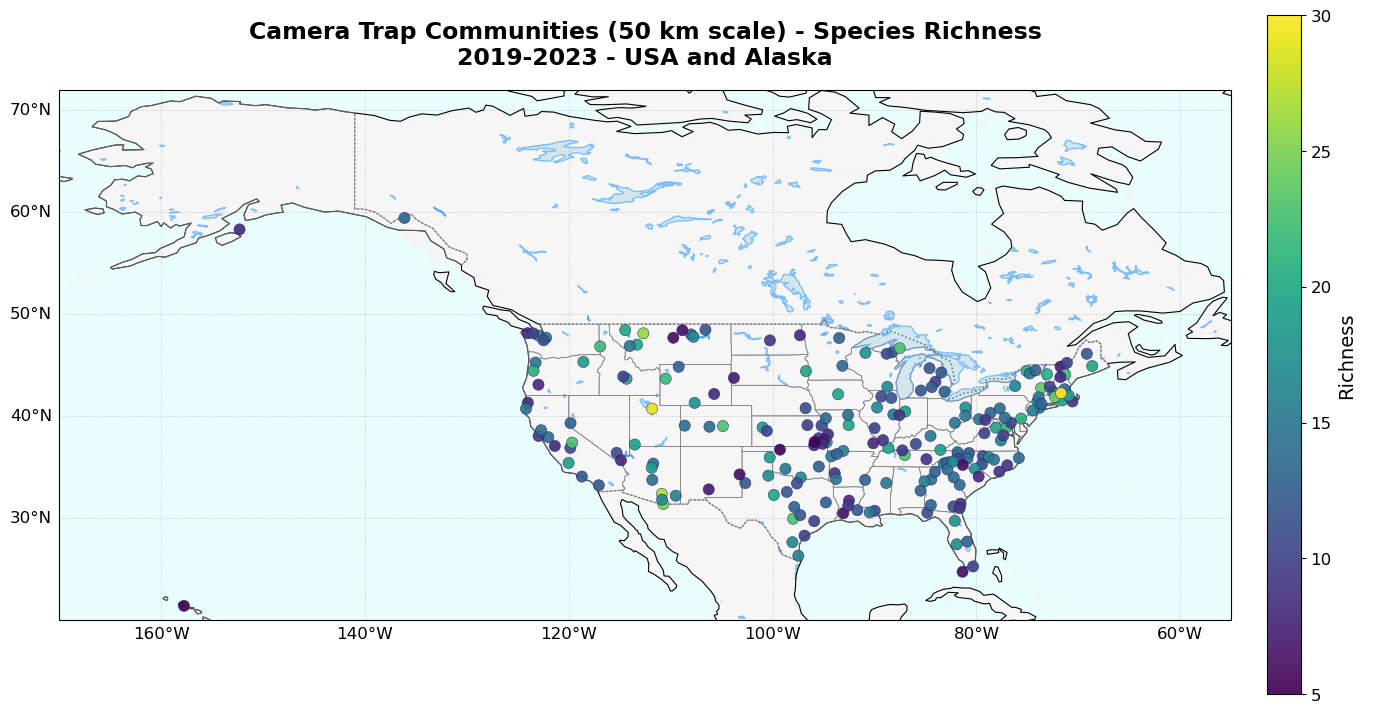

In [26]:
# Visualize the Species Richness of the 50km communities
df_plot = community_species.copy()

lons = df_plot['Centroid_Longitude']
lats = df_plot['Centroid_Latitude']
richness = df_plot['Richness']

fig = plt.figure(figsize=(15, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-170, -55, 20, 72], crs=ccrs.PlateCarree())

land = cfeature.NaturalEarthFeature(
    'physical', 'land', '50m', edgecolor='face', facecolor='whitesmoke', alpha=0.9)
ocean = cfeature.NaturalEarthFeature(
    'physical', 'ocean', '50m', edgecolor='none', facecolor='lightcyan', alpha=0.7)
lakes = cfeature.NaturalEarthFeature(
    'physical', 'lakes', '50m', edgecolor='dodgerblue', facecolor='lightblue', alpha=0.5)

ax.add_feature(ocean, zorder=0)
ax.add_feature(land, zorder=1)
ax.add_feature(lakes, zorder=2)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='dimgray', linewidth=1.1, zorder=3)
ax.add_feature(cfeature.COASTLINE, edgecolor='k', linewidth=0.8, zorder=3)
ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle='-', linewidth=0.5, zorder=3)

gl = ax.gridlines(
    draw_labels=True, linewidth=0.4, color='gray', alpha=0.4, linestyle='--'
)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'fontsize': 12}
gl.ylabel_style = {'fontsize': 12}

norm = mpl.colors.Normalize(vmin=richness.min(), vmax=richness.max())
cmap = plt.get_cmap('viridis')

sc = ax.scatter(
    lons, lats,
    c=richness, cmap=cmap, norm=norm,
    s=65, alpha=0.92,
    transform=ccrs.PlateCarree(),
    edgecolor='midnightblue', linewidth=0.35, zorder=10
)

cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.78, pad=0.025)
cbar.set_label('Richness\n', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.title(
    'Camera Trap Communities (50 km scale) - Species Richness\n2019-2023 - USA and Alaska',
    fontsize=17, fontweight='bold', pad=18
)
plt.tight_layout()
plt.show()


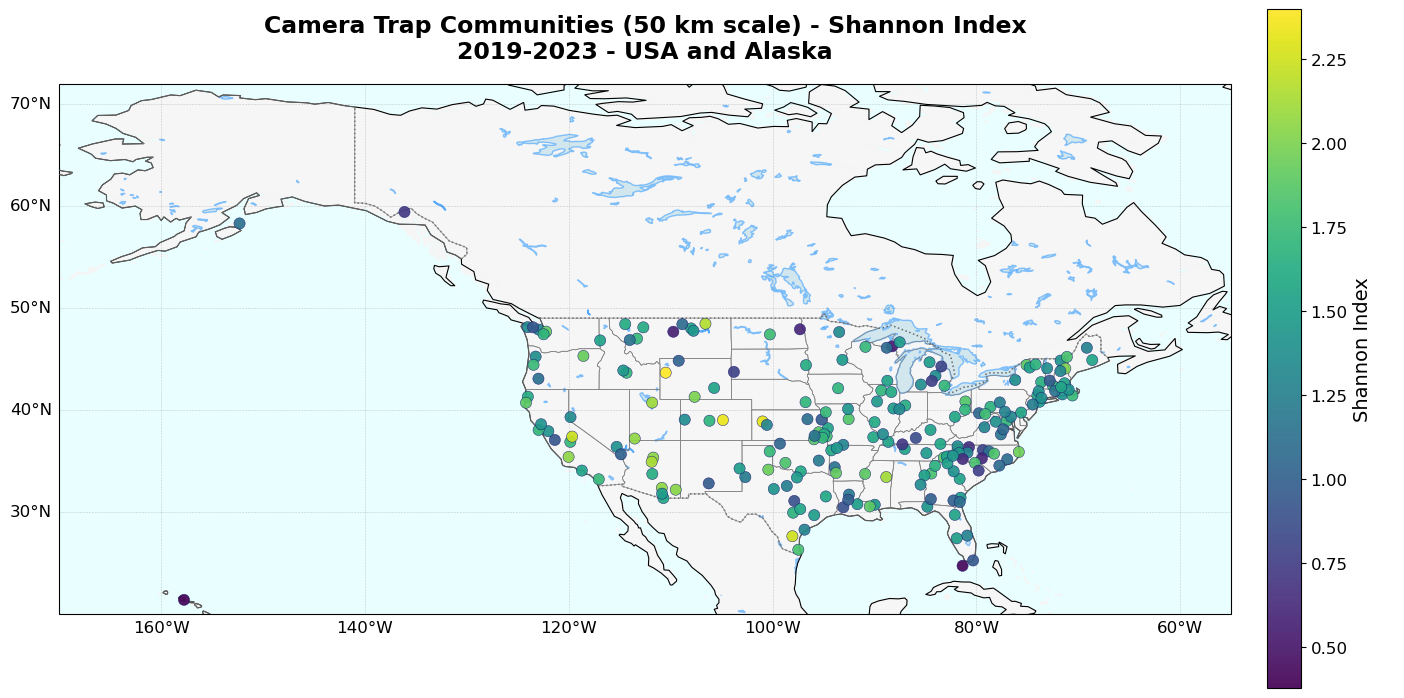

In [27]:
# Visualize the Shannon Index of the 50km communities
shannon = df_plot['Shannon_Index']

fig = plt.figure(figsize=(15, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-170, -55, 20, 72], crs=ccrs.PlateCarree())

land = cfeature.NaturalEarthFeature(
    'physical', 'land', '50m', edgecolor='face', facecolor='whitesmoke', alpha=0.9)
ocean = cfeature.NaturalEarthFeature(
    'physical', 'ocean', '50m', edgecolor='none', facecolor='lightcyan', alpha=0.7)
lakes = cfeature.NaturalEarthFeature(
    'physical', 'lakes', '50m', edgecolor='dodgerblue', facecolor='lightblue', alpha=0.5)

ax.add_feature(ocean, zorder=0)
ax.add_feature(land, zorder=1)
ax.add_feature(lakes, zorder=2)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='dimgray', linewidth=1.1, zorder=3)
ax.add_feature(cfeature.COASTLINE, edgecolor='k', linewidth=0.8, zorder=3)
ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle='-', linewidth=0.5, zorder=3)

gl = ax.gridlines(
    draw_labels=True, linewidth=0.4, color='gray', alpha=0.4, linestyle='--'
)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'fontsize': 12}
gl.ylabel_style = {'fontsize': 12}

norm = mpl.colors.Normalize(vmin=shannon.min(), vmax=shannon.max())
cmap = plt.get_cmap('viridis')

sc = ax.scatter(
    lons, lats,
    c=shannon, cmap=cmap, norm=norm,
    s=65, alpha=0.92,
    transform=ccrs.PlateCarree(),
    edgecolor='midnightblue', linewidth=0.35, zorder=10
)

cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.78, pad=0.025)
cbar.set_label('Shannon Index\n', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.title(
    'Camera Trap Communities (50 km scale) - Shannon Index\n2019-2023 - USA and Alaska',
    fontsize=17, fontweight='bold', pad=18
)
plt.tight_layout()
plt.show()


In [28]:
# Show rows where Richness == 10
richness_10 = df_plot[df_plot['Richness'] == 10]
print("Rows with Richness == 10:")
display(richness_10)

# Show rows where Shannon_Index == 1.5 (allowing for floating point tolerance)
shannon_1_5 = df_plot[np.isclose(df_plot['Shannon_Index'], 1.5, atol=0.01)]
print("Rows with Shannon_Index ≈ 1.5:")
display(shannon_1_5)

Rows with Richness == 10:


,Cluster_Agglo,Centroid_Latitude,Centroid_Longitude,Community_Species,Richness,Shannon_Index
33,33,25.227158,-80.335911,"[Procyon lotor, Didelphis virginiana, Neotoma ...",10,0.951889
42,42,39.328867,-76.620915,"[Sciurus carolinensis, Procyon lotor, Vulpes v...",10,1.316803
58,58,28.247368,-96.871798,"[Pecari tajacu, Odocoileus virginianus, Canis ...",10,1.288847
74,74,48.097686,-123.497618,"[Ursus americanus, Odocoileus hemionus, Lynx r...",10,0.938207
91,91,45.197025,-71.131659,"[Lepus americanus, Odocoileus virginianus, Alc...",10,1.810679
107,107,39.087598,-96.583434,"[Taxidea taxus, Canis latrans, Odocoileus virg...",10,1.120144
126,126,38.293372,-79.224670,"[Ursus americanus, Canis latrans, Sciurus caro...",10,1.304450
128,128,43.340295,-84.024535,"[Odocoileus virginianus, Sciurus carolinensis,...",10,1.349619
167,167,29.671455,-95.919450,"[Sciurus carolinensis, Procyon lotor, Dasypus ...",10,1.493201
173,173,38.794673,-89.998561,"[Odocoileus virginianus, Vulpes vulpes, Sciuru...",10,1.605800


Rows with Shannon_Index ≈ 1.5:


,Cluster_Agglo,Centroid_Latitude,Centroid_Longitude,Community_Species,Richness,Shannon_Index
1,1,40.794404,-73.811474,"[Sciurus carolinensis, Procyon lotor, Felis ca...",14,1.509974
66,66,31.381865,-81.566039,"[Didelphis virginiana, Odocoileus virginianus,...",9,1.501773
150,150,34.249387,-103.242700,"[Lepus californicus, Mephitis mephitis, Canis ...",6,1.501207
154,154,40.136181,-88.152095,"[Didelphis virginiana, Canis latrans, Odocoile...",15,1.499149
156,156,44.672208,-84.607929,"[Odocoileus virginianus, Canis latrans, Vulpes...",12,1.496113
167,167,29.671455,-95.919450,"[Sciurus carolinensis, Procyon lotor, Dasypus ...",10,1.493201
